In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [ ]:
####################
# Results Summary  #
####################

#Adonis - WUF - Significant explanatory variables inlude: Organ, Sex, PMI, & BMI

In [3]:
cadaver_nt = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_nt.rds")
cadaver = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver.rds")
#Subset to Italian data only
Ita = subset_samples(cadaver, Location=="Italy")
Ita.df = data.frame(sample_data(Ita))

In [29]:
Ita.df %>% group_by(Organ) %>% summarize(count=n())

Organ,count
Brain,35
Heart,29
Liver,36
Prostate,21
Spleen,24
Uterus,13


In [30]:
Ita.df %>% group_by(Sex) %>% summarize(count=n())

Sex,count
F,60
M,98


In [21]:
#Replace variable manners of death with correct category
Ita.df$The_manner_of_death = as.character(Ita.df$The_manner_of_death)
Ita.df$The_manner_of_death[Ita.df$The_manner_of_death == 'Accident_road traffic accident'] <- 'Accident'
Ita.df$The_manner_of_death[Ita.df$The_manner_of_death == 'Accident_Road traffic accident'] <- 'Accident'
Ita.df$The_manner_of_death[Ita.df$The_manner_of_death == 'Accident_Work related accident'] <- 'Accident'
Ita.df$The_manner_of_death[Ita.df$The_manner_of_death == 'Natural death'] <- 'Natural'
Ita.df$The_manner_of_death[Ita.df$The_manner_of_death == 'Undetermined'] <- 'Natural'
Ita.df$The_manner_of_death = as.factor(Ita.df$The_manner_of_death)
head(Ita.df$The_manner_of_death)

[1] Natural  Accident Natural  Accident Natural  Accident
Levels: Accident Homicide Natural Suicide

In [10]:
Ita.df %>% group_by(The_manner_of_death,Sex) %>% summarize(count=n())

The_manner_of_death,Sex,count
Accident,F,17
Accident,M,34
Homicide,F,5
Homicide,M,8
Natural,F,34
Natural,M,29
Suicide,F,4
Suicide,M,27


In [11]:
Ita.df %>% group_by(bmi_category,Sex) %>% summarize(count=n())

bmi_category,Sex,count
Normal,F,40
Normal,M,31
Obese,F,10
Obese,M,16
Overweight,F,5
Overweight,M,43
Underweight,F,5
Underweight,M,8


In [22]:
# WEIGHTED UNIFRAC
Ita.dist.wunif = distance(Ita, method = "wunifrac", type = "samples")
Ita.wunif.nostrata.adtest = adonis2(Ita.dist.wunif ~ Organ + Sex + Age + The_manner_of_death + PMI + bmi, data=Ita.df, by="margin")
Ita.wunif.nostrata.adtest

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGCGGCTACTTAAGTCCATCTTAAAAGTGCGGGGCTTAACCCCGTGATGGGATGGAAACTGAGAAGCTGGAGTGTCGGAGAGGAAAGTGGAATTCCTAGT -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Organ,5,1.4672272,0.09442529,3.683284,0.001
Sex,1,0.7751134,0.04988342,9.729108,0.001
Age,1,0.1730282,0.01113545,2.171824,0.045
The_manner_of_death,3,0.4309530,0.02773453,1.803086,0.031
PMI,1,0.5075475,0.03266387,6.370661,0.001
bmi,1,0.3361791,0.02163524,4.219670,0.003
Residual,145,11.5520812,0.74344899,NA,NA
Total,157,15.5384987,1.00000000,NA,NA


In [23]:
pval = c("0.001", "0.001", "0.045", "0.031", "0.001", "0.003")
corr.ad.test = p.adjust(pval, method = "bonferroni")
corr.ad.test

[1] 0.006 0.006 0.270 0.186 0.006 0.018

In [24]:
# UNWEIGHTED UNIFRAC
Ita.dist.unif = distance(Ita, method = "unifrac", type = "samples")
Ita.unif.nostrata.adtest = adonis2(Ita.dist.unif ~ Organ + Sex + Age + The_manner_of_death + PMI + bmi, data=Ita.df, by="margin")
Ita.unif.nostrata.adtest

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- GACAGAGGATGCAAGCGTTATCCGGAATGATTGGGCGTAAAGCGTCTGTAGGTGGCTTTTTAAGTTCGCCGTCAAATCCCAGGGCTCAACCCTGGACAGGCGGTGGAAACTACCAAGCTGGAGTACGGTAGGGGCAGAGGGAATTTCCGG -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Organ,5,4.9627197,0.17307666,6.812229,0.001
Sex,1,0.3248458,0.01132912,2.229548,0.017
Age,1,0.3951167,0.01377984,2.711845,0.007
The_manner_of_death,3,0.8783825,0.03063391,2.009564,0.003
PMI,1,0.3946987,0.01376526,2.708976,0.008
bmi,1,0.3155023,0.01100326,2.165419,0.030
Residual,145,21.1265465,0.73679603,NA,NA
Total,157,28.6735349,1.00000000,NA,NA


In [27]:
pval = c("0.001", "0.017", "0.007", "0.003", "0.008", "0.030")
corr.ad.test = p.adjust(pval, method = "bonferroni")
corr.ad.test

[1] 0.006 0.102 0.042 0.018 0.048 0.180

In [25]:
#Bray-Curtis
Ita.dist.bray = distance(Ita, method = "bray", type = "samples")
Ita.bray.nostrata.adtest = adonis2(Ita.dist.bray ~ Organ + Sex + Age + The_manner_of_death + PMI + bmi, data=Ita.df, by="margin")
Ita.bray.nostrata.adtest

,Df,SumOfSqs,R2,F,Pr(>F)
Organ,5,5.0979225,0.10200235,3.892822,0.001
Sex,1,2.2399517,0.04481832,8.552242,0.001
Age,1,0.7137007,0.01428016,2.724943,0.006
The_manner_of_death,3,1.5639461,0.03129239,1.990407,0.005
PMI,1,1.1699776,0.02340963,4.467030,0.001
bmi,1,0.8464148,0.01693558,3.231652,0.002
Residual,145,37.9775249,0.75987755,NA,NA
Total,157,49.9784797,1.00000000,NA,NA


In [28]:
pval = c("0.001", "0.001", "0.006", "0.005", "0.001", "0.002")
corr.ad.test = p.adjust(pval, method = "bonferroni")
corr.ad.test

[1] 0.006 0.006 0.036 0.030 0.006 0.012

In [26]:
#Jaccard
Ita.dist.jaccard = distance(Ita, method = "jaccard", type = "samples")
Ita.jaccard.nostrata.adtest = adonis2(Ita.dist.jaccard ~ Organ + Sex + Age + The_manner_of_death + PMI + bmi, data=Ita.df, by="margin")
Ita.jaccard.nostrata.adtest

,Df,SumOfSqs,R2,F,Pr(>F)
Organ,5,4.9094214,0.08554454,3.133446,0.001
Sex,1,2.3997872,0.04181525,7.658341,0.001
Age,1,0.6901099,0.01202487,2.202319,0.009
The_manner_of_death,3,1.8192612,0.03169984,1.935244,0.003
PMI,1,1.0751010,0.01873317,3.430925,0.001
bmi,1,0.8342891,0.01453713,2.662432,0.006
Residual,145,45.4366214,0.79171347,NA,NA
Total,157,57.3902343,1.00000000,NA,NA


In [18]:
pval = c("0.001", "0.001", "0.021", "0.001", "0.001", "0.010")
corr.ad.test = p.adjust(pval, method = "bonferroni")
corr.ad.test

[1] 0.006 0.006 0.126 0.006 0.006 0.060

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCATGGCAAGTCTGAAGTGAAAGCCCGGGGCTCAACCCCGGGACTGCTTTGGAAACTGTCAGGCTAGAGTGCTGGAGAGGTAAGTGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”

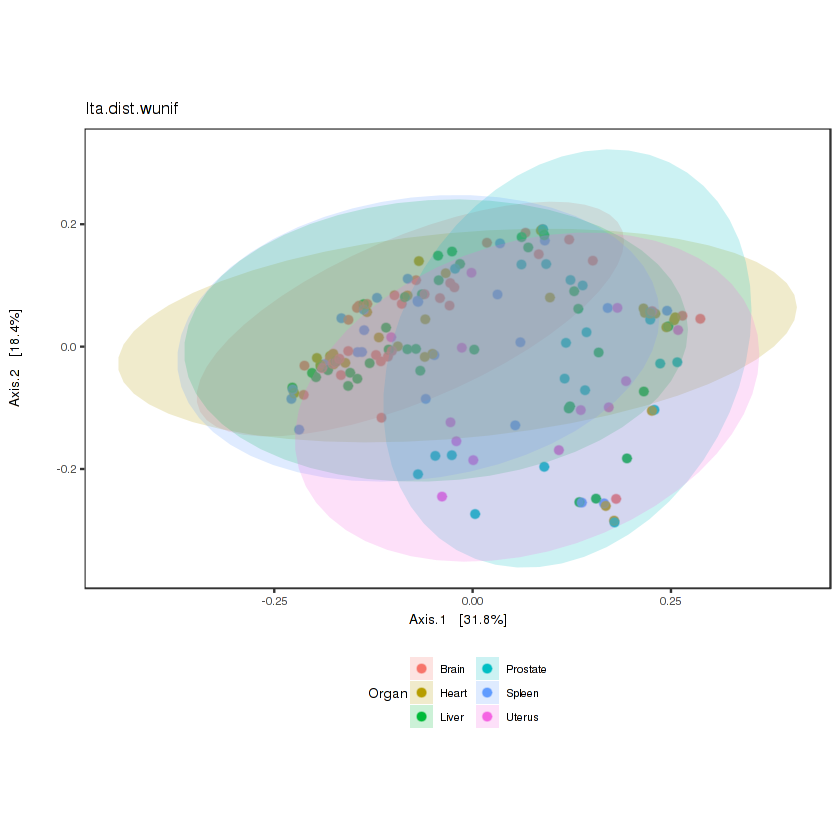

In [9]:
Ita.dist.wunif.log = ordinate(Ita, method = "PCoA", distance = "Wunifrac")
Ita.dist.wunif.evals = Ita.dist.unif.log$values$Eigenvalues
p = plot_ordination(Ita, Ita.dist.wunif.log, color = "Organ") + 
    ggtitle("Ita.dist.wunif") + 
    geom_point(size=2, alpha=0.4) + 
    #scale_colour_brewer(palette='BrBG') +
    #scale_colour_manual(values=c("#885122", #Finland
    #                             "#35938B", #Italy
    #                             "#77933C")) + #USA
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Organ), linetype=0) +
    #scale_fill_brewer(palette='BrBG')+
    #scale_fill_manual(values=c("#885122", #Finland
    #                             "#35938B", #Italy
    #                             "#77933C")) + #USA
    coord_fixed(sqrt(Ita.dist.wunif.evals[2] / Ita.dist.wunif.evals[1]))

p = p + guides(colour = guide_legend(title = "Organ", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

#png('PCoA_fecal_diet.unif.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTTTTAAGTCTGATGTGAAAGCCTTCGGCTCAACCGAAGAAGTGCATCGGAAACTGGGAAACTTGAGTGCAGAAGAGGACAGTGGAACTCCATG -- in the phylogenetic tree in the data you provided.”

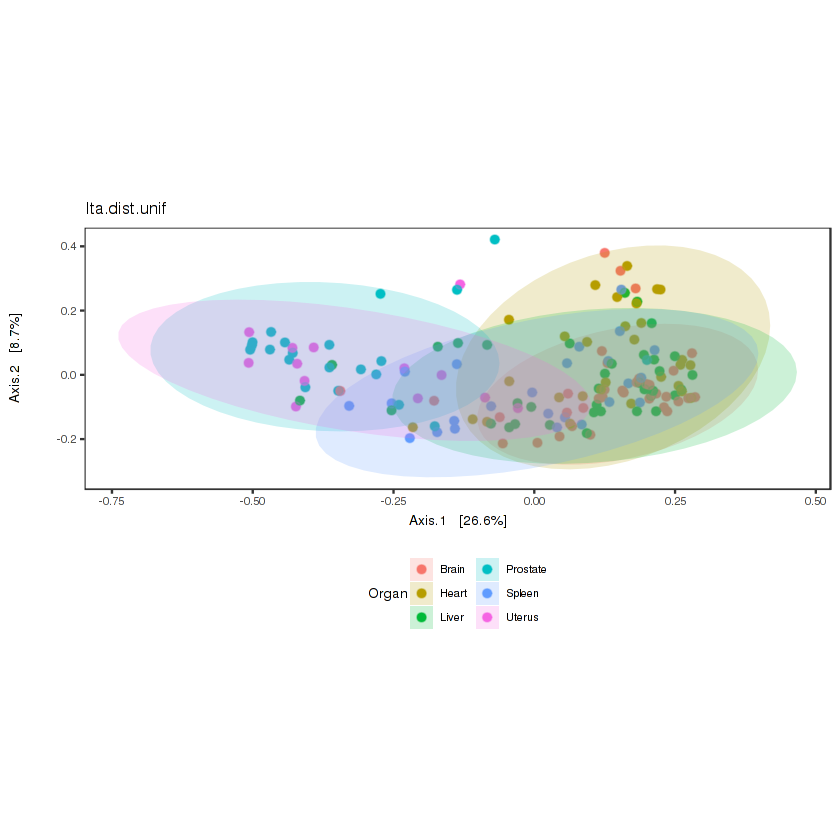

In [10]:
Ita.dist.unif.log = ordinate(Ita, method = "PCoA", distance = "unifrac")
Ita.dist.unif.evals = Ita.dist.unif.log$values$Eigenvalues
p = plot_ordination(Ita, Ita.dist.unif.log, color = "Organ") + 
    ggtitle("Ita.dist.unif") + 
    geom_point(size=2, alpha=0.4) + 
    #scale_colour_brewer(palette='BrBG') +
    #scale_colour_manual(values=c("#885122", #Finland
    #                             "#35938B", #Italy
    #                             "#77933C")) + #USA
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Organ), linetype=0) +
    #scale_fill_brewer(palette='BrBG')+
    #scale_fill_manual(values=c("#885122", #Finland
    #                             "#35938B", #Italy
    #                             "#77933C")) + #USA
    coord_fixed(sqrt(Ita.dist.unif.evals[2] / Ita.dist.unif.evals[1]))

p = p + guides(colour = guide_legend(title = "Organ", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

#png('PCoA_fecal_diet.unif.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”

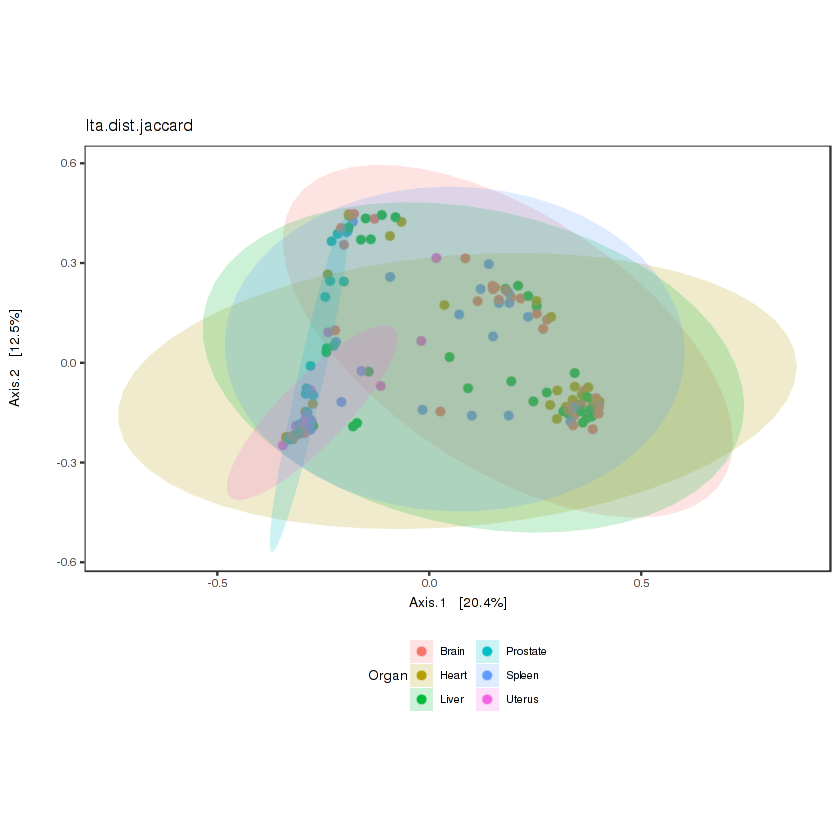

In [12]:
Ita.dist.jaccard.log = ordinate(Ita, method = "PCoA", distance = "jaccard")
Ita.dist.jaccard.evals = Ita.dist.jaccard.log$values$Eigenvalues
p = plot_ordination(Ita, Ita.dist.jaccard.log, color = "Organ") + 
    ggtitle("Ita.dist.jaccard") + 
    geom_point(size=2, alpha=0.4) + 
    #scale_colour_brewer(palette='BrBG') +
    #scale_colour_manual(values=c("#885122", #Finland
    #                             "#35938B", #Italy
    #                             "#77933C")) + #USA
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Organ), linetype=0) +
    #scale_fill_brewer(palette='BrBG')+
    #scale_fill_manual(values=c("#885122", #Finland
    #                             "#35938B", #Italy
    #                             "#77933C")) + #USA
    coord_fixed(sqrt(Ita.dist.jaccard.evals[2] / Ita.dist.jaccard.evals[1]))

p = p + guides(colour = guide_legend(title = "Organ", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

#png('PCoA_fecal_diet.jaccard.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

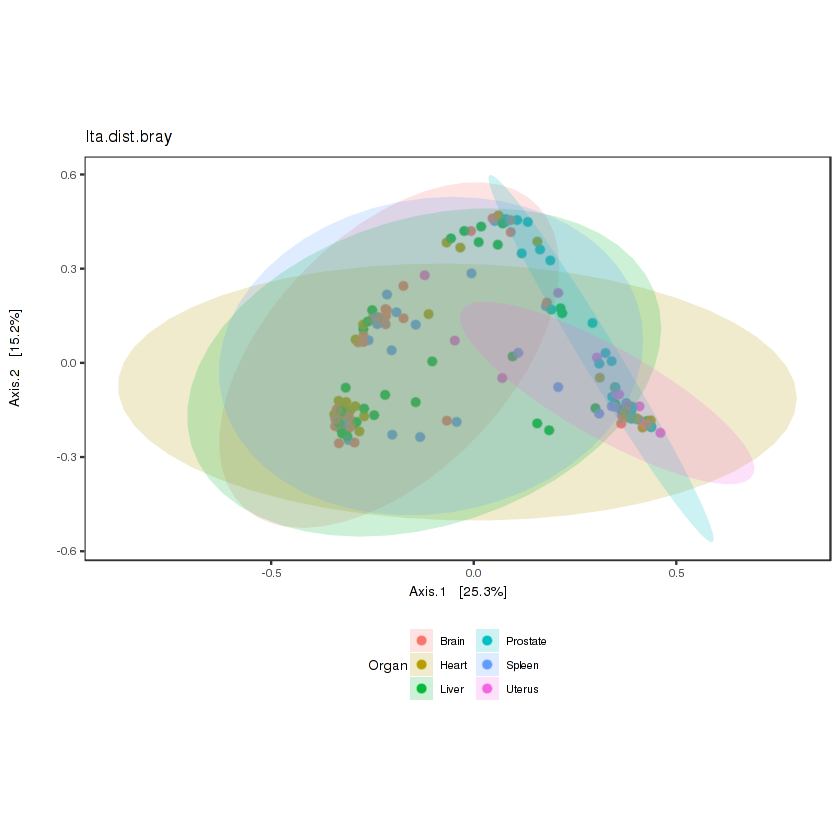

In [13]:
Ita.dist.bray.log = ordinate(Ita, method = "PCoA", distance = "bray")
Ita.dist.bray.evals = Ita.dist.bray.log$values$Eigenvalues
p = plot_ordination(Ita, Ita.dist.bray.log, color = "Organ") + 
    ggtitle("Ita.dist.bray") + 
    geom_point(size=2, alpha=0.4) + 
    #scale_colour_brewer(palette='BrBG') +
    #scale_colour_manual(values=c("#885122", #Finland
    #                             "#35938B", #Italy
    #                             "#77933C")) + #USA
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Organ), linetype=0) +
    #scale_fill_brewer(palette='BrBG')+
    #scale_fill_manual(values=c("#885122", #Finland
    #                             "#35938B", #Italy
    #                             "#77933C")) + #USA
    coord_fixed(sqrt(Ita.dist.bray.evals[2] / Ita.dist.bray.evals[1]))

p = p + guides(colour = guide_legend(title = "Organ", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

#png('PCoA_fecal_diet.bray.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

### ANCOM

In [23]:
#Ita = prune_samples(sample_sums(Ita)>0, Ita)
#Ita.otu = data.frame(otu_table(Ita))
Ita.otu = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/ANCOM/Ita.otu.csv")
#Ita.meta = data.frame(sample_data(Ita))
Ita.meta = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/ANCOM/Ita.meta.csv")

In [38]:
Ita.taxa.csv = data.frame(tax_table(Ita))
write.csv(Ita.taxa.csv, "/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/ANCOM/Ita.taxa.csv")

In [34]:
#Group into uterus vs all other organs
Ita = Ita.meta %>%
mutate(Single_Organ = Organ)

Ita$Single_Organ = as.character(Ita$Single_Organ)
Ita$Single_Organ[which(Ita$Organ != "Uterus")] = "Other"
Ita$Single_Organ = as.factor(Ita$Single_Organ)
head(Ita$Single_Organ)

#RUN ANCOM

comparison_test=ANCOM.main(OTUdat=Ita.otu,
                           Vardat=Ita,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Single_Organ",
                           adj.formula="Sex+Age+PMI+bmi_category+The_manner_of_death", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Ita.byorgan.ancom = comparison_test$W.taxa

write.csv(Ita.byorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/ANCOM/uterus.ancom.csv")

[1] Other Other Other Other Other Other
Levels: Other Uterus

In [61]:
spleen = Ita.meta %>%
mutate(Single_Organ = Organ)

spleen$Single_Organ = as.character(spleen$Single_Organ)
spleen$Single_Organ[which(spleen$Organ != "Spleen")] = "Other"
spleen$Single_Organ = as.factor(spleen$Single_Organ)
head(spleen$Single_Organ)

[1] Other  Other  Other  Other  Spleen Other 
Levels: Other Spleen

In [62]:
write.csv(brain, "/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/brain.meta.csv")
write.csv(heart, "/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/heart.meta.csv")
write.csv(liver, "/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/liver.meta.csv")
write.csv(spleen, "/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/spleen.meta.csv")
write.csv(prostate, "/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/prostate.meta.csv")
write.csv(uterus, "/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/uterus.meta.csv")

In [77]:
#Read metadata in/out to convert to mapfile for new ps object (retaining Single_Organ column)
library(DESeq2)

brain.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/brain.meta.txt")
heart.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/heart.meta.txt")
liver.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/liver.meta.txt")
spleen.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/spleen.meta.txt")
prostate.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/prostate.meta.txt")
uterus.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/uterus.meta.txt")

cadaver_nt = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_nt.rds")
#Subset to Italian data only
Ita = subset_samples(cadaver_nt, Location=="Italy")

#create new ps objects 

tree = phy_tree(Ita)
otu = otu_table(Ita)
tax = tax_table(Ita)

brain.ps = merge_phyloseq(brain.map, tree, otu, tax)
heart.ps = merge_phyloseq(heart.map, tree, otu, tax)
liver.ps = merge_phyloseq(liver.map, tree, otu, tax)
spleen.ps = merge_phyloseq(spleen.map, tree, otu, tax)
prostate.ps = merge_phyloseq(prostate.map, tree, otu, tax)
uterus.ps = merge_phyloseq(uterus.map, tree, otu, tax)


In [78]:
#convert ps to deseq object

brain_dds = phyloseq_to_deseq2(brain.ps, ~Single_Organ)
heart_dds = phyloseq_to_deseq2(heart.ps, ~Single_Organ)
liver_dds = phyloseq_to_deseq2(liver.ps, ~Single_Organ)
spleen_dds = phyloseq_to_deseq2(spleen.ps, ~Single_Organ)
prostate_dds = phyloseq_to_deseq2(prostate.ps, ~Single_Organ)
uterus_dds = phyloseq_to_deseq2(uterus.ps, ~Single_Organ)

converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode


In [80]:
#Run DESeq - brain 

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(brain_dds), 1, gm_mean)


brain_dds = estimateSizeFactors(brain_dds, geoMeans = geoMeans)
brain_dds = estimateDispersions(brain_dds)
abund = getVarianceStabilizedData(brain_dds)

brain_dds = DESeq(brain_dds, test="Wald", fitType="parametric")

res = results(brain_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(brain.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/brain.deseq.log2fold.csv")


###################################################################################################
#Run DESeq - heart 

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(heart_dds), 1, gm_mean)


heart_dds = estimateSizeFactors(heart_dds, geoMeans = geoMeans)
heart_dds = estimateDispersions(heart_dds)
abund = getVarianceStabilizedData(heart_dds)

heart_dds = DESeq(heart_dds, test="Wald", fitType="parametric")

res = results(heart_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(heart.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/heart.deseq.log2fold.csv")

###################################################################################################
#Run DESeq - liver 

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(liver_dds), 1, gm_mean)


liver_dds = estimateSizeFactors(liver_dds, geoMeans = geoMeans)
liver_dds = estimateDispersions(liver_dds)
abund = getVarianceStabilizedData(liver_dds)

liver_dds = DESeq(liver_dds, test="Wald", fitType="parametric")

res = results(liver_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(liver.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/liver.deseq.log2fold.csv")


###################################################################################################
#Run DESeq - spleen 

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(spleen_dds), 1, gm_mean)


spleen_dds = estimateSizeFactors(spleen_dds, geoMeans = geoMeans)
spleen_dds = estimateDispersions(spleen_dds)
abund = getVarianceStabilizedData(spleen_dds)

spleen_dds = DESeq(spleen_dds, test="Wald", fitType="parametric")

res = results(spleen_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(spleen.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/spleen.deseq.log2fold.csv")


###################################################################################################
#Run DESeq - prostate 

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(prostate_dds), 1, gm_mean)


prostate_dds = estimateSizeFactors(prostate_dds, geoMeans = geoMeans)
prostate_dds = estimateDispersions(prostate_dds)
abund = getVarianceStabilizedData(prostate_dds)

prostate_dds = DESeq(prostate_dds, test="Wald", fitType="parametric")

res = results(prostate_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(prostate.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/prostate.deseq.log2fold.csv")


###################################################################################################
#Run DESeq - uterus 

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(uterus_dds), 1, gm_mean)


uterus_dds = estimateSizeFactors(uterus_dds, geoMeans = geoMeans)
uterus_dds = estimateDispersions(uterus_dds)
abund = getVarianceStabilizedData(uterus_dds)

uterus_dds = DESeq(uterus_dds, test="Wald", fitType="parametric")

res = results(uterus_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(uterus.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/DESEQ/uterus.deseq.log2fold.csv")


found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 322 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 315 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in 

In [83]:
ancom_0.60.org = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/Italian_Cadaver/Oct2019_update/ANCOM/organs.ancom.csv")

png 
  2

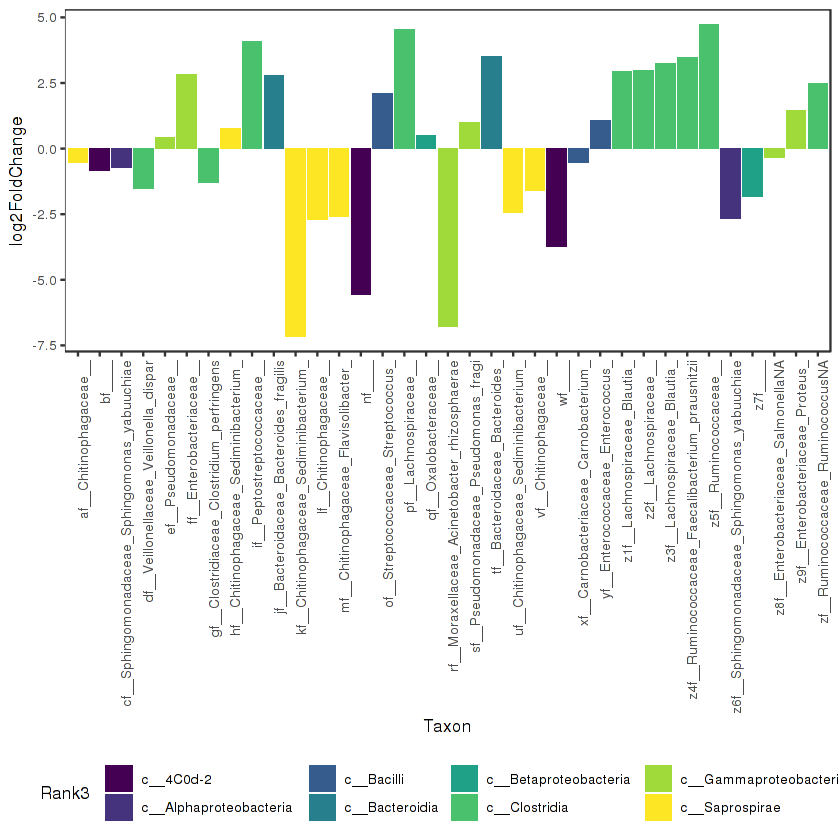

In [84]:
library(viridis)
p = ggplot(ancom_0.60.org, aes(x = Taxon, y = log2FoldChange, fill=Rank3)) + geom_bar(stat="identity")

p = p + scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)

p = p + theme_bw() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           #legend.key = element_blank(),
                           axis.text.x = element_text(angle = 90, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p



png('Organs_ANCOM_0.60_log2foldchange.viridis.png', width=10, height=10, units='in', res=300)
plot(p)
dev.off()

In [19]:
library(exactRankTests)
library(nlme)
library(ggplot2)

ancom.W = function(otu_data,var_data,
                   adjusted,repeated,
                   main.var,adj.formula,
                   repeat.var,long,rand.formula,
                   multcorr,sig){
  
  n_otu=dim(otu_data)[2]-1
  
  otu_ids=colnames(otu_data)[-1]
  
  if(repeated==F){
    data_comp=data.frame(merge(otu_data,var_data,by="Sample.ID",all.y=T),row.names=NULL)
    #data_comp=data.frame(merge(otu_data,var_data[,c("Sample.ID",main.var)],by="Sample.ID",all.y=T),row.names=NULL)
  }else if(repeated==T){
    data_comp=data.frame(merge(otu_data,var_data,by="Sample.ID"),row.names=NULL)
   # data_comp=data.frame(merge(otu_data,var_data[,c("Sample.ID",main.var,repeat.var)],by="Sample.ID"),row.names=NULL)
  }
  
  base.formula = paste0("lr ~ ",main.var)
  if(repeated==T){
    repeat.formula = paste0(base.formula," | ", repeat.var)
  }
  if(adjusted==T){
    adjusted.formula = paste0(base.formula," + ", adj.formula)
  }
  
  if( adjusted == F & repeated == F ){
    fformula  <- formula(base.formula)
  } else if( adjusted == F & repeated == T & long == T ){
    fformula  <- formula(base.formula)   
  }else if( adjusted == F & repeated == T & long == F ){
    fformula  <- formula(repeat.formula)   
  }else if( adjusted == T & repeated == F  ){
    fformula  <- formula(adjusted.formula)   
  }else if( adjusted == T & repeated == T  ){
    fformula  <- formula(adjusted.formula)   
  }else{
    stop("Problem with data. Dataset should contain OTU abundances, groups, 
         and optionally an ID for repeated measures.")
  }
  
  
  
    if( repeated==FALSE & adjusted == FALSE){
       if( length(unique(data_comp[,which(colnames(data_comp)==main.var)]))==2 ){
          tfun <- exactRankTests::wilcox.exact
       } else{
          tfun <- stats::kruskal.test
    }
    }else if( repeated==FALSE & adjusted == TRUE){
      tfun <- stats::aov
    }else if( repeated== TRUE & adjusted == FALSE & long == FALSE){
      tfun <- stats::friedman.test
    }else if( repeated== TRUE & adjusted == FALSE & long == TRUE){
      tfun <- nlme::lme
    }else if( repeated== TRUE & adjusted == TRUE){
      tfun <- nlme::lme
    }
  
  logratio.mat <- matrix(NA, nrow=n_otu, ncol=n_otu)
  for(ii in 1:(n_otu-1)){
    for(jj in (ii+1):n_otu){
      data.pair <- data_comp[,which(colnames(data_comp)%in%otu_ids[c(ii,jj)])]
      lr <- log((1+as.numeric(data.pair[,1]))/(1+as.numeric(data.pair[,2])))
      
      lr_dat <- data.frame( lr=lr, data_comp,row.names=NULL )
      
      if(adjusted==FALSE&repeated==FALSE){  ## Wilcox, Kruskal Wallis
        logratio.mat[ii,jj] <- tfun( formula=fformula, data = lr_dat)$p.value
      }else if(adjusted==FALSE&repeated==TRUE&long==FALSE){ ## Friedman's 
        logratio.mat[ii,jj] <- tfun( formula=fformula, data = lr_dat)$p.value
      }else if(adjusted==TRUE&repeated==FALSE){ ## ANOVA
        model=tfun(formula=fformula, data = lr_dat,na.action=na.omit)   
        picker=which(gsub(" ","",row.names(summary(model)[[1]]))==main.var)  
        logratio.mat[ii,jj] <- summary(model)[[1]][["Pr(>F)"]][picker]
      }else if(repeated==TRUE&long==TRUE){ ## GEE
        model=tfun(fixed=fformula,data = lr_dat,
                   random = formula(rand.formula),
                   correlation=corAR1(),
                   na.action=na.omit)   
        picker=which(gsub(" ","",row.names(anova(model)))==main.var)
        logratio.mat[ii,jj] <- anova(model)[["p-value"]][picker]
      }
      
    }
  } 
  
  ind <- lower.tri(logratio.mat)
  logratio.mat[ind] <- t(logratio.mat)[ind]
  
  
  logratio.mat[which(is.finite(logratio.mat)==FALSE)] <- 1
  
  mc.pval <- t(apply(logratio.mat,1,function(x){
    s <- p.adjust(x, method = "BH")
    return(s)
  }))
  
  a <- logratio.mat[upper.tri(logratio.mat,diag=FALSE)==TRUE]
  
  b <- matrix(0,ncol=n_otu,nrow=n_otu)
  b[upper.tri(b)==T] <- p.adjust(a, method = "BH")
  diag(b)  <- NA
  ind.1    <- lower.tri(b)
  b[ind.1] <- t(b)[ind.1]
  
  #########################################
  ### Code to extract surrogate p-value
  surr.pval <- apply(mc.pval,1,function(x){
    s0=quantile(x[which(as.numeric(as.character(x))<sig)],0.95)
    # s0=max(x[which(as.numeric(as.character(x))<alpha)])
    return(s0)
  })
  #########################################
  ### Conservative
  if(multcorr==1){
    W <- apply(b,1,function(x){
      subp <- length(which(x<sig))
    })
    ### Moderate
  } else if(multcorr==2){
    W <- apply(mc.pval,1,function(x){
      subp <- length(which(x<sig))
    })
    ### No correction
  } else if(multcorr==3){
    W <- apply(logratio.mat,1,function(x){
      subp <- length(which(x<sig))
    })
  }
  
  return(W)
  }



ANCOM.main = function(OTUdat,Vardat,
                      adjusted,repeated,
                      main.var,adj.formula,
                      repeat.var,longitudinal,
                      random.formula,
                      multcorr,sig,
                      prev.cut){
  
  p.zeroes=apply(OTUdat[,-1],2,function(x){
    s=length(which(x==0))/length(x)
  })
  
  zeroes.dist=data.frame(colnames(OTUdat)[-1],p.zeroes,row.names=NULL)
  colnames(zeroes.dist)=c("Taxon","Proportion_zero")
  
  zero.plot = ggplot(zeroes.dist, aes(x=Proportion_zero)) + 
              geom_histogram(binwidth=0.1,colour="black",fill="white") + 
              xlab("Proportion of zeroes") + ylab("Number of taxa") +
              theme_bw()
  
  #print(zero.plot)
  
  OTUdat.thinned=OTUdat
  OTUdat.thinned=OTUdat.thinned[,c(1,1+which(p.zeroes<prev.cut))]
  
  otu.names=colnames(OTUdat.thinned)[-1]
  
  W.detected   <- ancom.W(OTUdat.thinned,Vardat,
                          adjusted,repeated,
                          main.var,adj.formula,
                          repeat.var,longitudinal,random.formula,
                          multcorr,sig)
  
  W_stat       <- W.detected
  
  
  ### Bubble plot
  
  W_frame = data.frame(otu.names,W_stat,row.names=NULL)
  W_frame = W_frame[order(-W_frame$W_stat),]
  
  W_frame$detected_0.9=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.8=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.7=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.6=rep(FALSE,dim(W_frame)[1])
  
  W_frame$detected_0.9[which(W_frame$W_stat>0.9*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.8[which(W_frame$W_stat>0.8*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.7[which(W_frame$W_stat>0.7*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.6[which(W_frame$W_stat>0.6*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  
  final_results=list(W_frame,zero.plot)
  names(final_results)=c("W.taxa","PLot.zeroes")
  return(final_results)
    }

 Package ‘exactRankTests’ is no longer under development.
 Please consider using package ‘coin’ instead.


Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse

